# Working with Gemini in Pixeltable

Pixeltable's Gemini integration enables you to access the Gemini LLM via the Google Gemini API.

### Prerequisites

- A Google AI Studio account with an API key (https://aistudio.google.com/app/apikey)

### Important notes

- Google AI Studio usage may incur costs based on your plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter a Gemini API key obtained via Google AI Studio.

In [ ]:
%pip install -qU pixeltable google-genai

In [ ]:
import os
import getpass

if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = getpass.getpass('Google AI Studio API Key:')

Now let's create a Pixeltable directory to hold the tables for our demo.

In [1]:
import pixeltable as pxt

# Remove the 'gemini_demo' directory and its contents, if it exists
pxt.drop_dir('gemini_demo', force=True)
pxt.create_dir('gemini_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory 'gemini_demo'.


## Generate content

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from Gemini.

In [2]:
from google.genai.types import GenerateContentConfigDict
from pixeltable.functions import gemini

# Create a table in Pixeltable and pick a model hosted on Google AI Studio with some parameters

t = pxt.create_table('gemini_demo/text', {'input': pxt.String})

config = GenerateContentConfigDict(
    stop_sequences=['\n'],
    max_output_tokens=300,
    temperature=1.0,
    top_p=0.95,
    top_k=40,
)
t.add_computed_column(output=gemini.generate_content(
    t.input,
    model='gemini-2.0-flash',
    config=config
))

Created table 'text'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [3]:
# Ask Gemini to generate some content based on the input
t.insert([
    {'input': 'Write a story about a magic backpack.'},
    {'input': 'Tell me a science joke.'}
])

Inserted 2 rows with 0 errors in 1.43 s (1.39 rows/s)


2 rows inserted.

In [4]:
# Parse the response into a new column
t.add_computed_column(response=t.output['candidates'][0]['content']['parts'][0]['text'])
t.select(t.input, t.response).head()

Added 2 column values with 0 errors in 0.03 s (62.79 rows/s)


input,response
Tell me a science joke.,Why did the chemist make a terrible fisherman?
Write a story about a magic backpack.,"Maya hated Mondays. Especially this Monday. Her alarm hadn't gone off, she’d spilled orange juice down her favourite t-shirt, and to top it all off, her usual bus was late. As she stomped into Mr. Abernathy’s dusty old antique shop, looking for her forgotten library book, she was about as thrilled as a cat in a bathtub."


## Generate images with Imagen

In [5]:
from google.genai.types import GenerateImagesConfigDict

images_t = pxt.create_table('gemini_demo/images', {'prompt': pxt.String})

config = GenerateImagesConfigDict(aspect_ratio='16:9')
images_t.add_computed_column(generated_image=gemini.generate_images(
    images_t.prompt,
    model='imagen-4.0-generate-001',
    config=config
))

Created table 'images'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [6]:
images_t.insert([{'prompt': 'A friendly dinosaur playing tennis in a cornfield'}])

Inserted 1 row with 0 errors in 9.41 s (0.11 rows/s)


1 row inserted.

prompt,generated_image
A friendly dinosaur playing tennis in a cornfield,

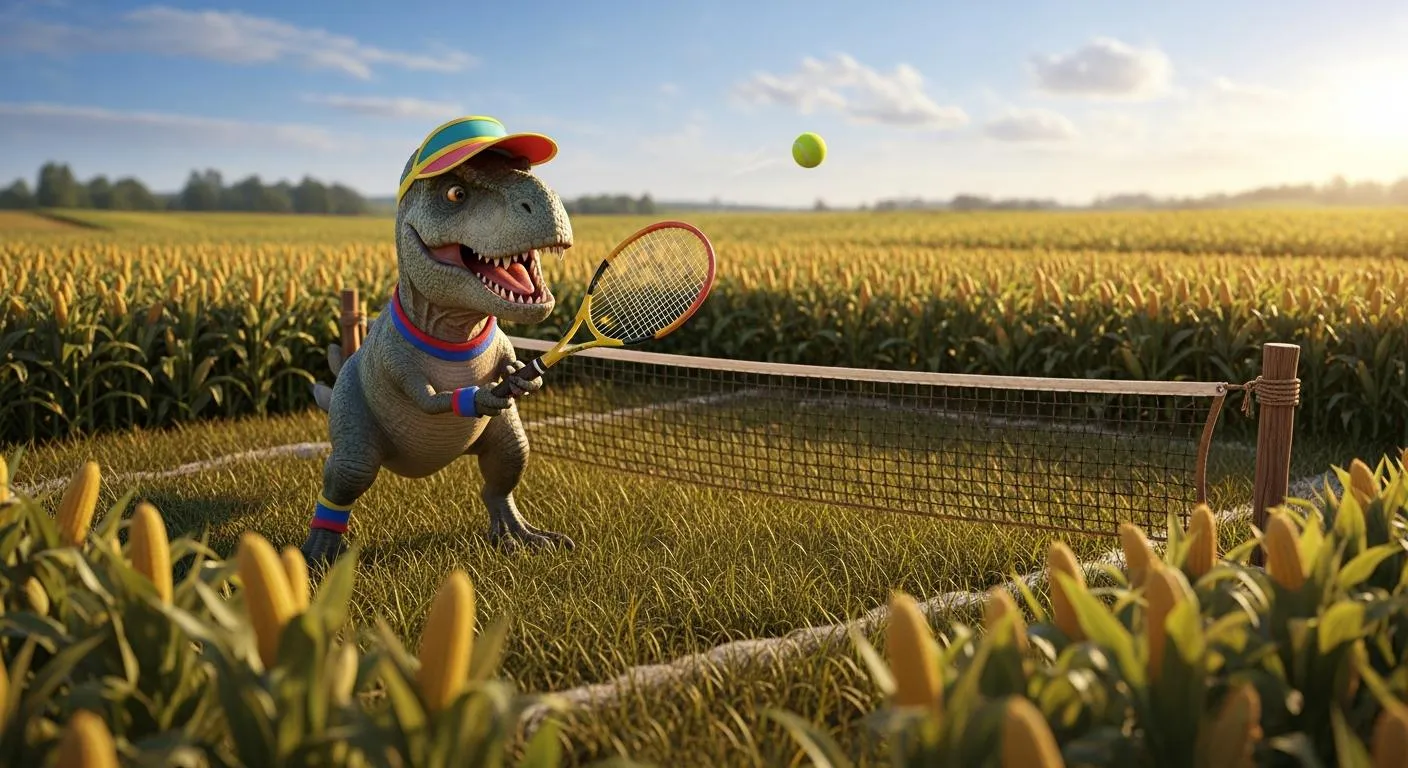

In [7]:
images_t.head()

## Generate video with Veo

In [8]:
videos_t = pxt.create_table('gemini_demo/videos', {'prompt': pxt.String})

videos_t.add_computed_column(generated_video=gemini.generate_videos(
    videos_t.prompt,
    model='veo-2.0-generate-001',
))

Created table 'videos'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [9]:
videos_t.insert([{'prompt': 'A giant pixel floating over the open ocean in a sea of data'}])

Inserted 1 row with 0 errors in 46.23 s (0.02 rows/s)


1 row inserted.

prompt,generated_video
A giant pixel floating over the open ocean in a sea of data,

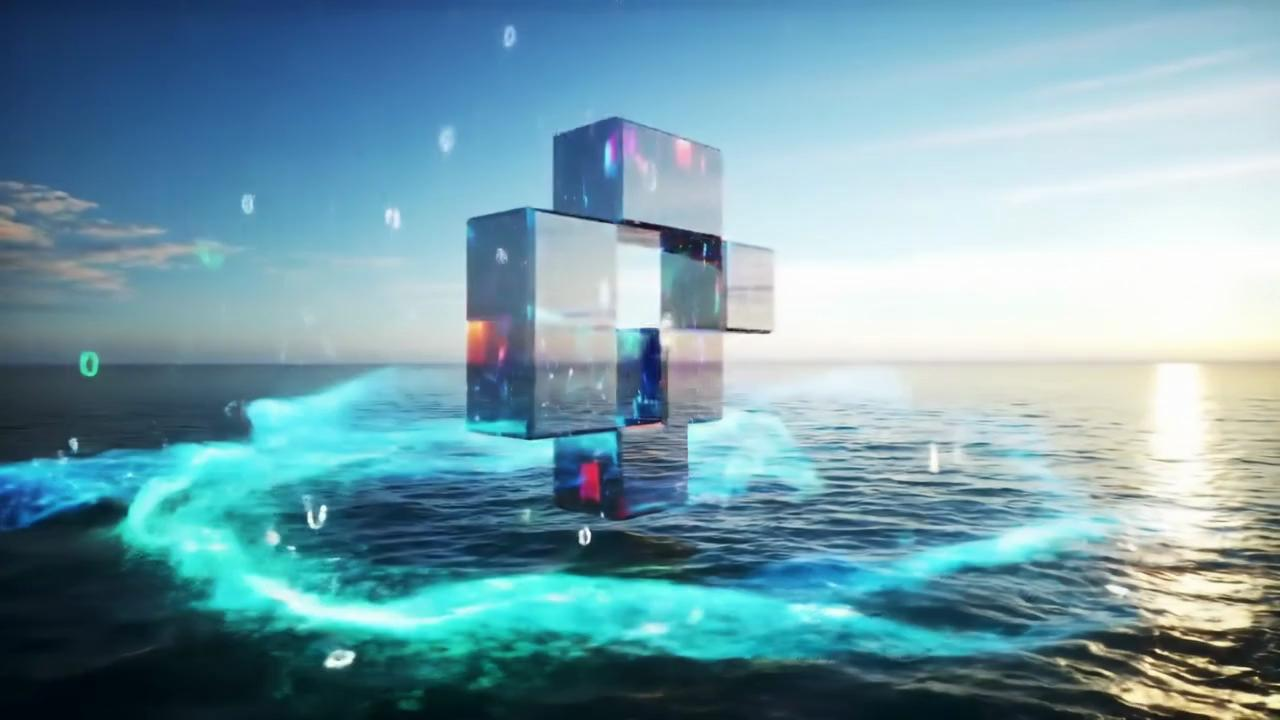

In [10]:
videos_t.head()

## Generate Video from an existing Image

We'll add an additional computed column to our existing `images_t` to animate the generated images.

In [11]:
images_t.add_computed_column(generated_video=gemini.generate_videos(
    image=images_t.generated_image,
    model='veo-2.0-generate-001',
))

Added 1 column value with 0 errors in 40.00 s (0.03 rows/s)


1 row updated.

prompt,generated_image,generated_video
A friendly dinosaur playing tennis in a cornfield,,

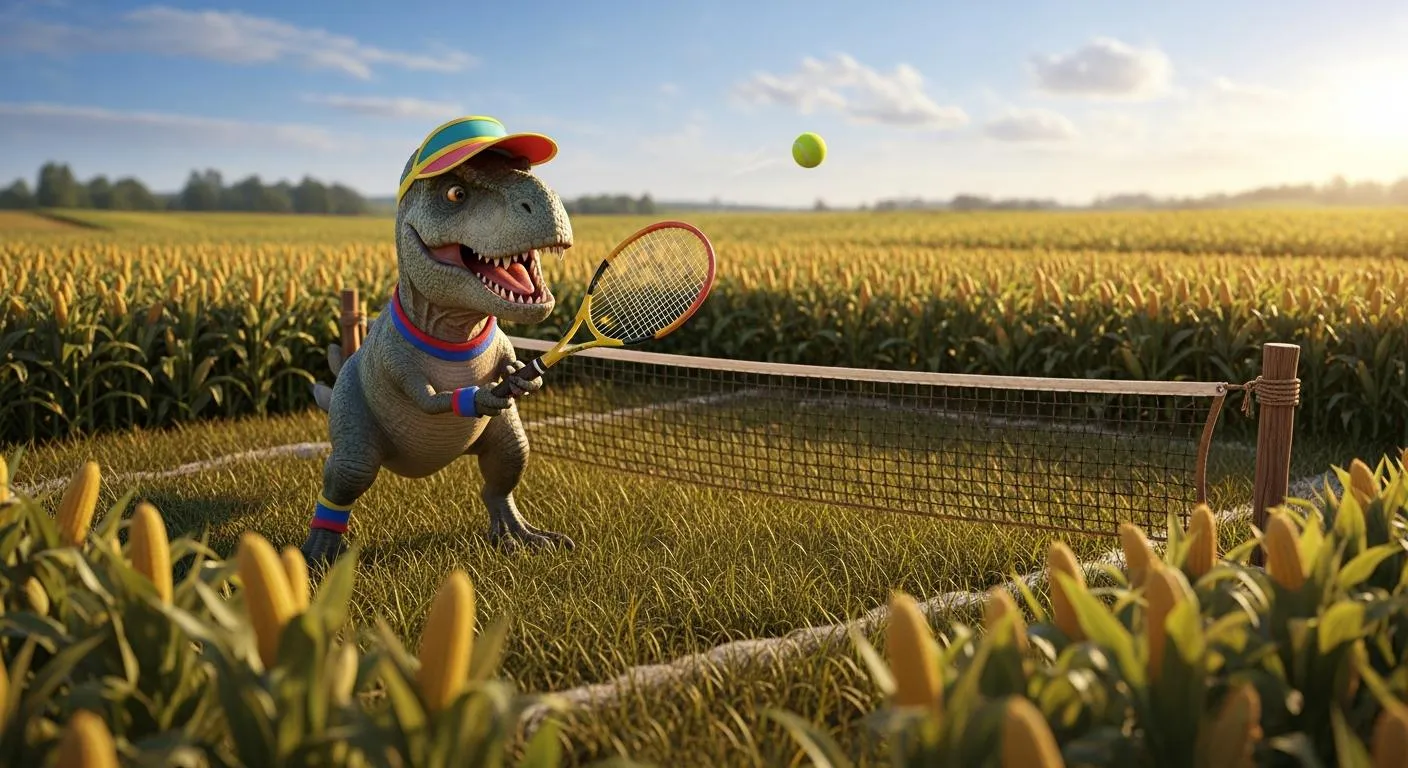
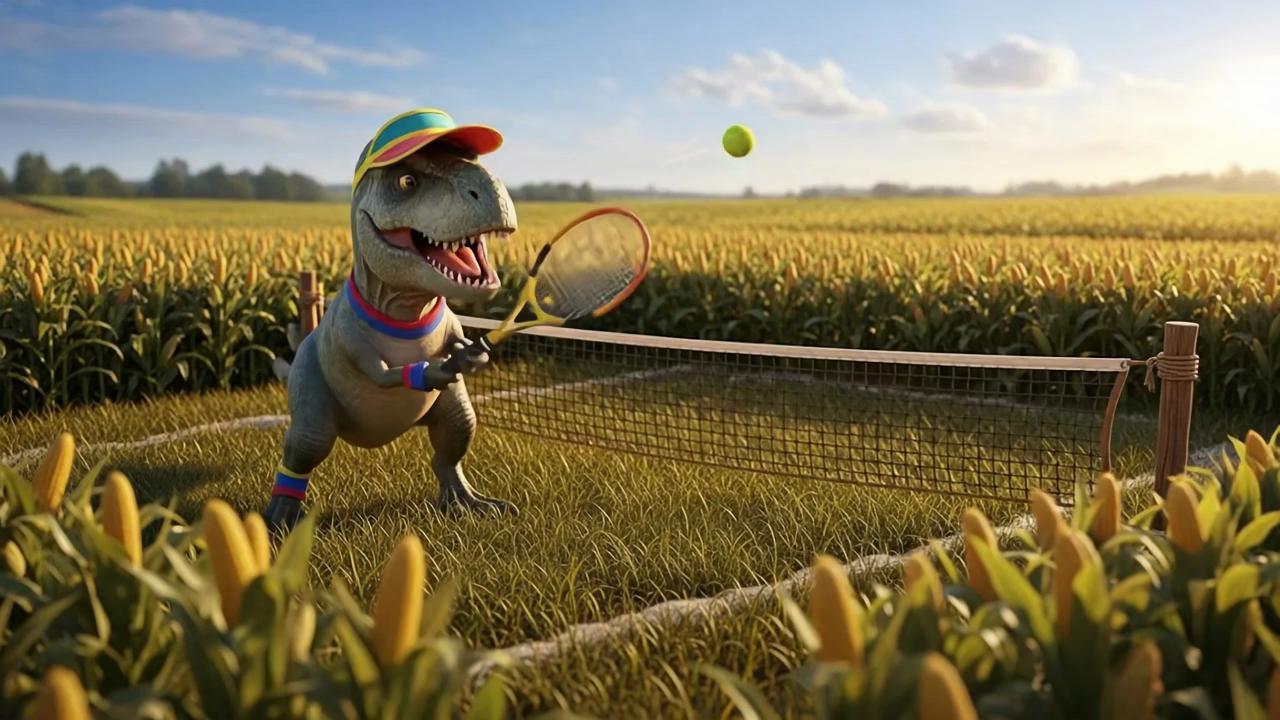

In [12]:
images_t.head()

### Learn more

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://docs.pixeltable.com/howto/use-cases/rag-operations) tutorial.

If you have any questions, don't hesitate to reach out.